In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

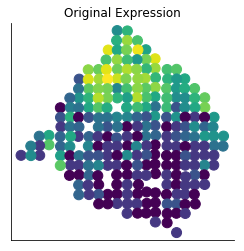

In [3]:
figsize(4, 4)
plt.scatter(sample_info.x, -sample_info.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Original Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-unshuff-example.pdf');

In [4]:
sample_info_shuffle = sample_info.copy()

In [5]:
tmp = sample_info.index.values.copy()
np.random.shuffle(tmp)
sample_info_shuffle['x'] = sample_info['x'][tmp].values
sample_info_shuffle['y'] = sample_info['y'][tmp].values

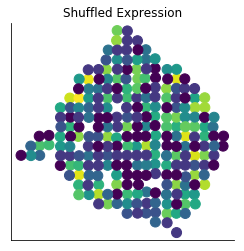

In [6]:
plt.scatter(sample_info_shuffle.x, -sample_info_shuffle.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Shuffled Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-shuff-example.pdf');

In [7]:
import NaiveDE

In [8]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info_shuffle, dfm.T, 'np.log(total_counts)').T

In [9]:
import SpatialDE

In [10]:
X = sample_info_shuffle[['x', 'y']]

In [11]:
shuffle_results = SpatialDE.run(X, res)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.13s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
INFO:root:Model 2 of 10                                                                                                
INFO:root:Model 3 of 10                                                                                                
INFO:root:Model 4 of 10                                                                                                
INFO:root:Model 5 of 10                                                                                                
INFO:root:Model 6 of 10                                                                                                
INFO:root:Model 7 of 10                                                                                                
INFO:root:Model 8 of 10                                                                                                
INFO:root:Mod

In [12]:
shuffle_results.query('qval < 0.05').shape

(5, 17)

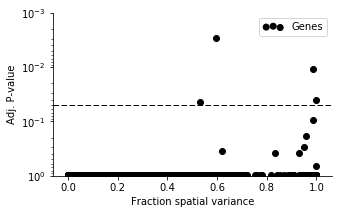

In [13]:
figsize(5, 3)

plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.qval, c='k', label='Genes', rasterized=True);
plt.ylim(1e-3, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');
plt.legend(scatterpoints=3);
plt.savefig('shuffled_BC_FSV_qval.pdf');

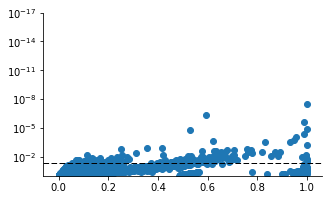

In [14]:
plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.pval);
plt.ylim(1e-17, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);

In [15]:
shuffle_results.sort_values('pval').head(10)

,Gower,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,BIC,max_ll_null,LLR,fraction_spatial_variance,pval,qval
3248,0.994366,4,PRR19,0.641736,0.000449,134.513639,-1.362566,0.822575,SE,250,0.001000,-246.941434,104.184632,30.329007,0.999548,3.646320e-08,0.000469
9607,0.978164,4,LYSMD4,1.087806,0.666669,94.116491,-1.498125,0.358305,SE,250,0.001000,-166.147138,68.683667,25.432824,0.594689,4.580578e-07,0.002944
10797,0.936002,4,GRAMD1B,1.843940,0.012744,124.902625,-1.094074,0.422734,SE,250,0.001000,-227.719406,102.764471,22.138154,0.986567,2.537168e-06,0.010873
3424,0.994366,4,WDR6,0.641736,0.000503,50.556112,-1.433568,0.930899,SE,250,0.001000,-79.026380,31.471263,19.084849,0.999494,1.250335e-05,0.040186
8333,0.978164,4,WDR17,1.087806,0.866061,85.155215,-1.421701,0.312401,SE,250,0.000501,-148.224586,66.678893,18.476321,0.530393,1.720284e-05,0.044232
3409,0.994366,4,ZNF718,0.641736,0.012317,118.158035,-1.368869,0.828419,SE,250,0.000500,-214.230225,101.479391,16.678643,0.987765,4.427666e-05,0.094870
11964,0.834688,4,KLK10,3.125663,0.037629,84.608957,-1.101033,0.462643,SE,250,0.000500,-147.132070,69.485238,15.123719,0.956863,1.006902e-04,0.184925
2558,0.994366,4,SLC12A6,0.641736,0.053177,-42.427856,-1.488247,1.021657,SE,250,0.001000,106.941555,-56.408429,13.980574,0.949236,1.847093e-04,0.296828
9888,0.978164,4,ZNF880,1.087806,0.599453,81.450215,-1.379571,0.314785,SE,250,0.001001,-140.814586,67.969698,13.480517,0.620026,2.410533e-04,0.344331
2399,0.994366,4,KCNQ1,0.641736,0.073504,116.048533,-1.434593,0.881373,SE,250,0.001000,-210.011222,103.102378,12.946155,0.931168,3.205793e-04,0.382406


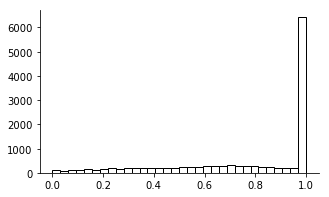

In [16]:
shuffle_results.pval.hist(bins=32, fc='w', ec='k', grid=False);

In [17]:
from scipy import stats

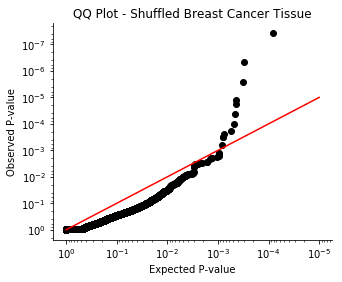

In [18]:
figsize(5, 4)

chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=shuffle_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(shuffle_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Shuffled Breast Cancer Tissue');
plt.savefig('shuffled_bc_qq_plot.pdf');